In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [69]:
df_raw = pd.read_pickle("FBP.pickle")

In [70]:
df_raw.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2


In [71]:
df = df_raw.copy()

In [72]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873173 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   EXT1    873173 non-null  int64
 1   EXT2    873173 non-null  int64
 2   EXT3    873173 non-null  int64
 3   EXT4    873173 non-null  int64
 4   EXT5    873173 non-null  int64
 5   EXT6    873173 non-null  int64
 6   EXT7    873173 non-null  int64
 7   EXT8    873173 non-null  int64
 8   EXT9    873173 non-null  int64
 9   EXT10   873173 non-null  int64
 10  AGR1    873173 non-null  int64
 11  AGR2    873173 non-null  int64
 12  AGR3    873173 non-null  int64
 13  AGR4    873173 non-null  int64
 14  AGR5    873173 non-null  int64
 15  AGR6    873173 non-null  int64
 16  AGR7    873173 non-null  int64
 17  AGR8    873173 non-null  int64
 18  AGR9    873173 non-null  int64
 19  AGR10   873173 non-null  int64
 20  CSN1    873173 non-null  int64
 21  CSN2    873173 non-null  int64
 22  CSN3    873173 non-

In [74]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873173 entries, 0 to 1015340
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   EXT1    873173 non-null  int64
 1   EXT2    873173 non-null  int64
 2   EXT3    873173 non-null  int64
 3   EXT4    873173 non-null  int64
 4   EXT5    873173 non-null  int64
 5   EXT6    873173 non-null  int64
 6   EXT7    873173 non-null  int64
 7   EXT8    873173 non-null  int64
 8   EXT9    873173 non-null  int64
 9   EXT10   873173 non-null  int64
 10  AGR1    873173 non-null  int64
 11  AGR2    873173 non-null  int64
 12  AGR3    873173 non-null  int64
 13  AGR4    873173 non-null  int64
 14  AGR5    873173 non-null  int64
 15  AGR6    873173 non-null  int64
 16  AGR7    873173 non-null  int64
 17  AGR8    873173 non-null  int64
 18  AGR9    873173 non-null  int64
 19  AGR10   873173 non-null  int64
 20  CSN1    873173 non-null  int64
 21  CSN2    873173 non-null  int64
 22  CSN3    873173 non-

In [76]:
df.isnull().values.any()

False

In [77]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2


In [78]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [79]:
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


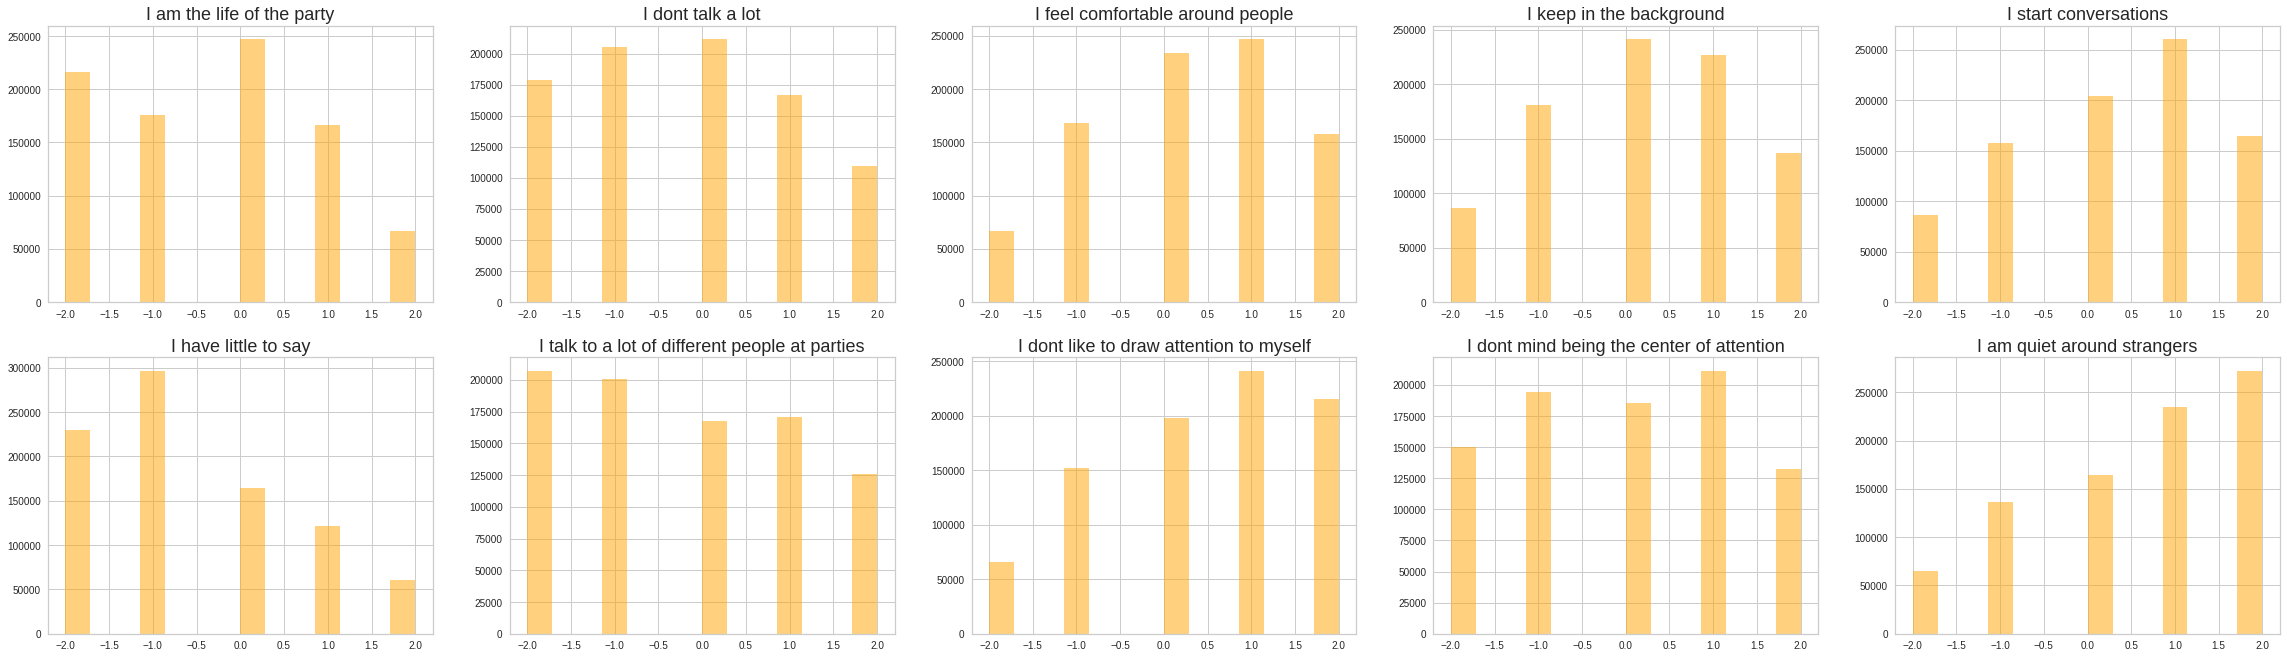

In [80]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


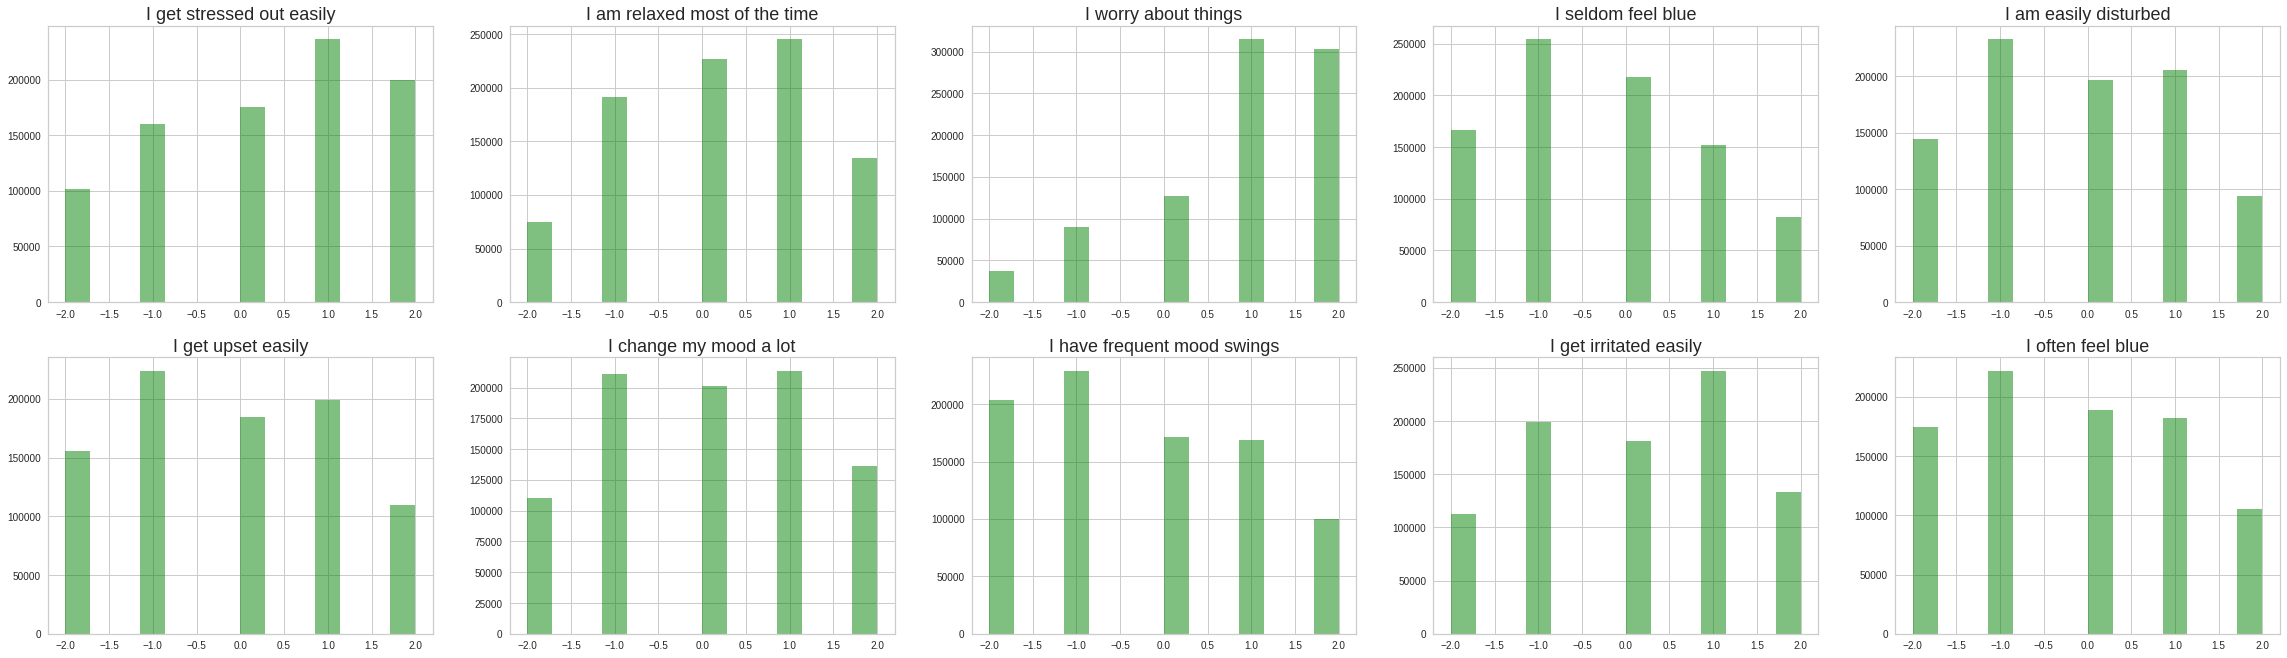

In [81]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'green')

Q&As Related to Agreeable Personality


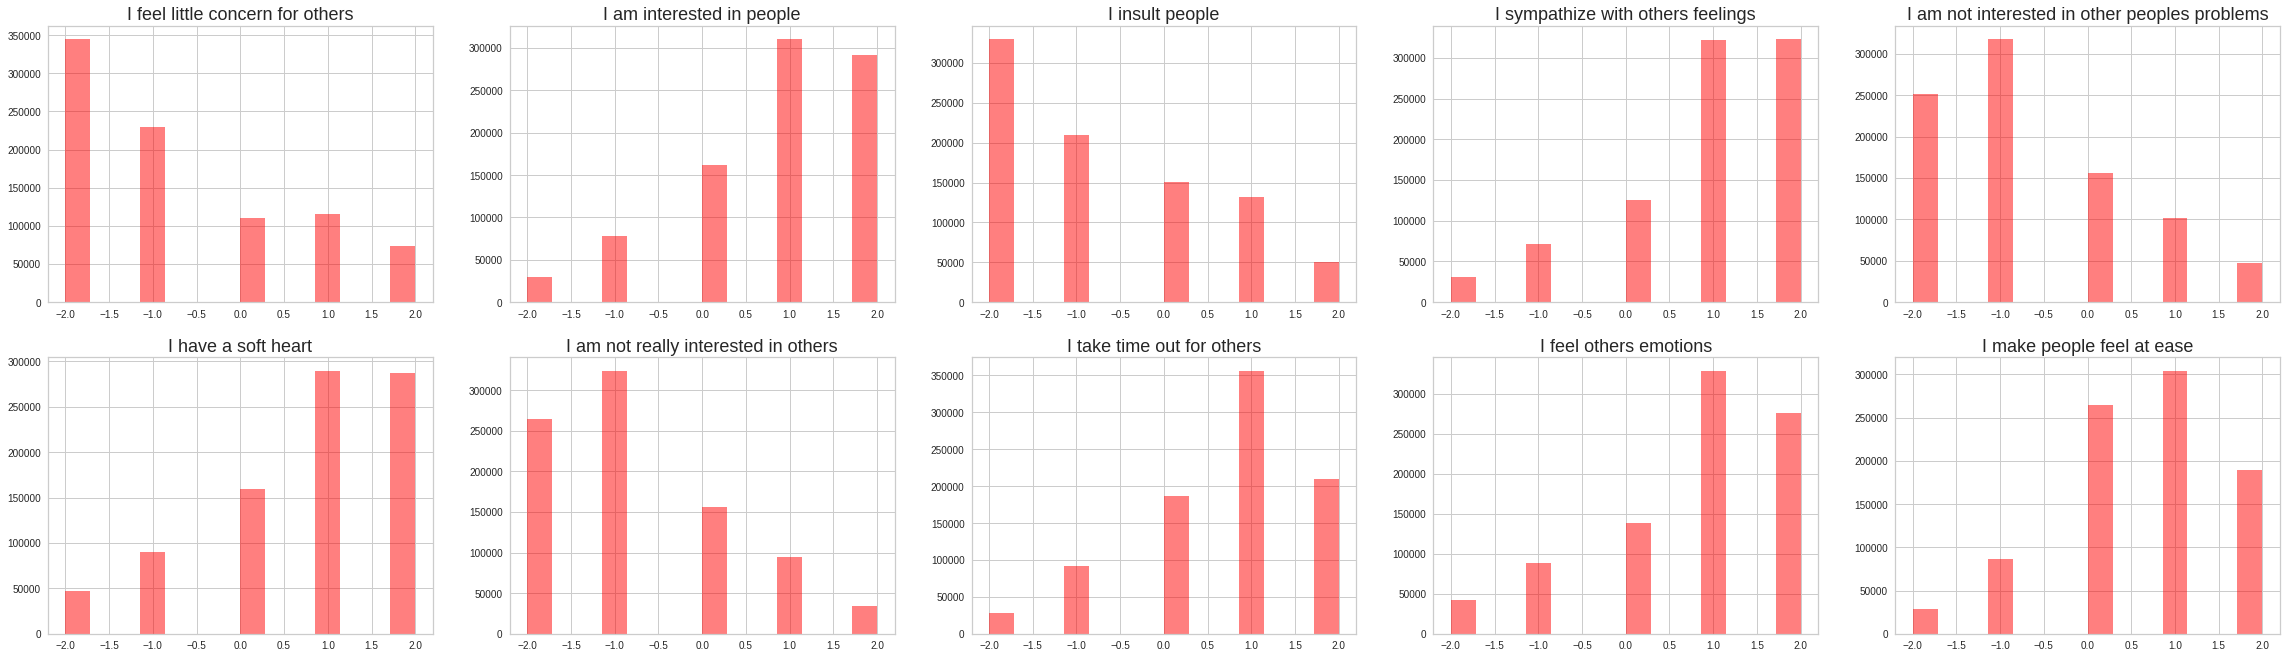

In [82]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


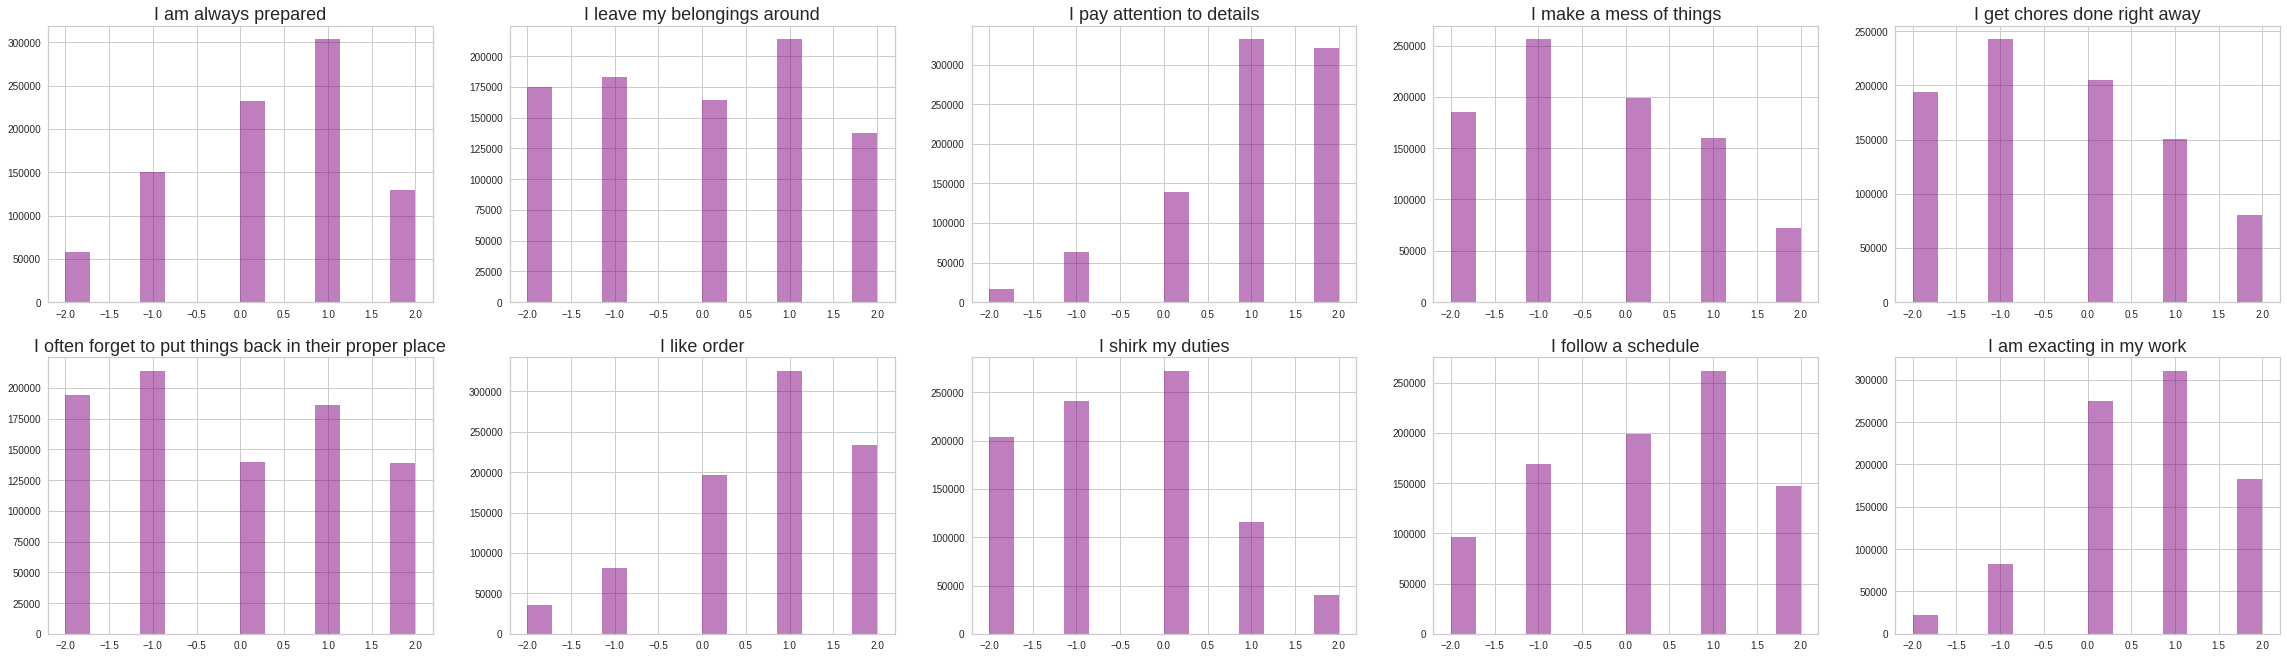

In [83]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


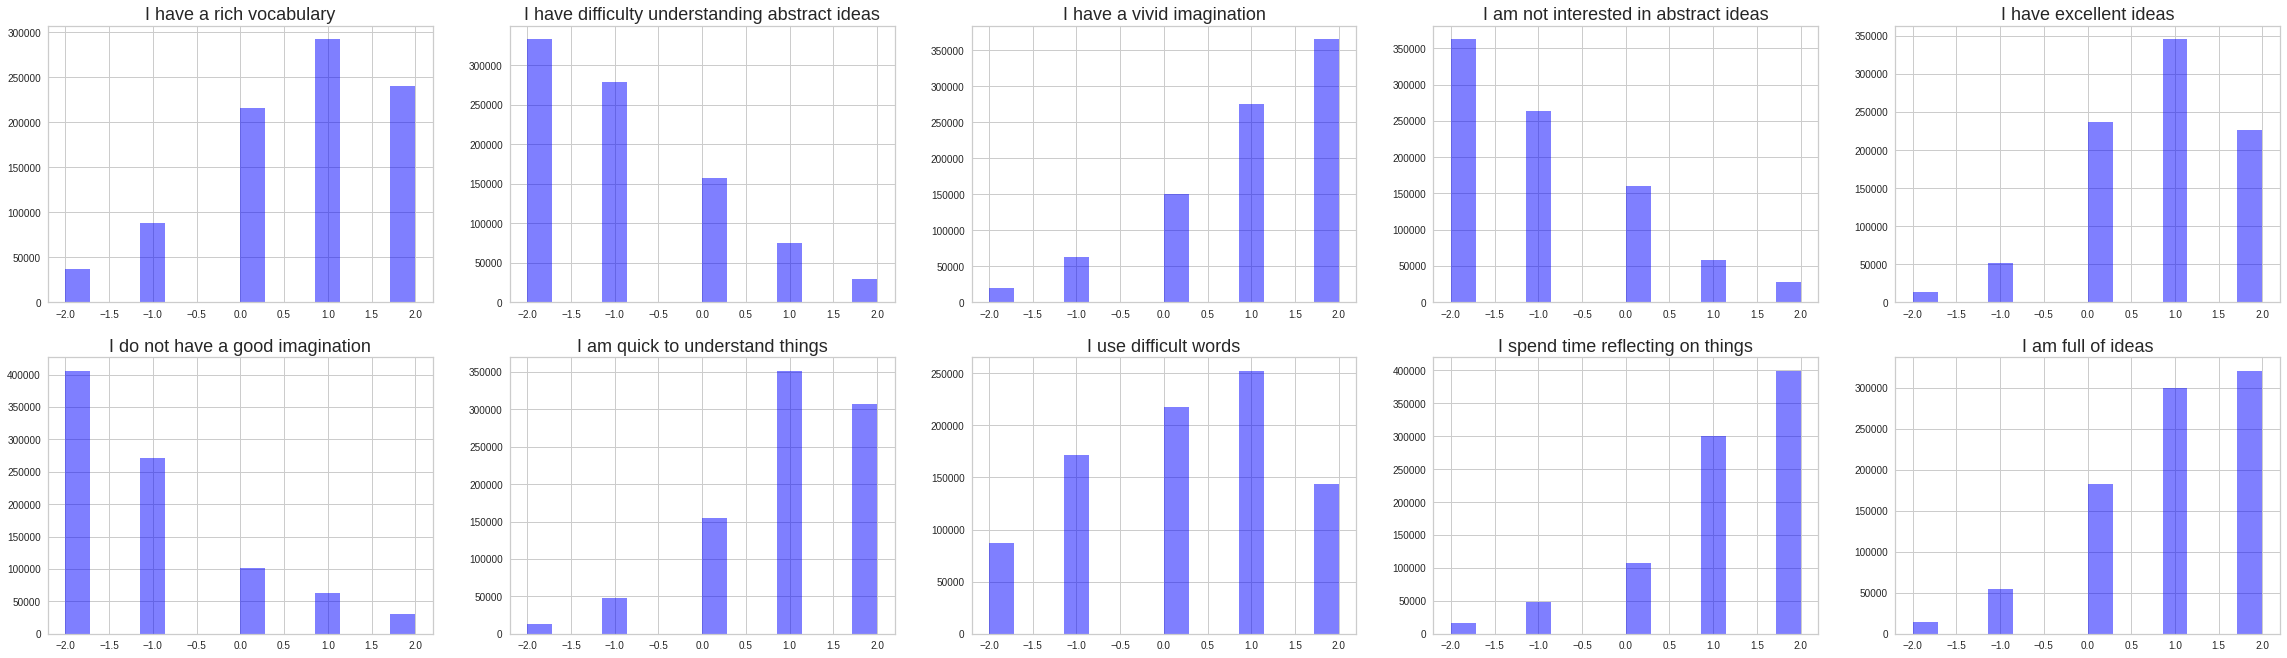

In [84]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [85]:
columns = list(df.columns)

In [86]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer

/home/abdullahsiddiky/DataScience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/abdullahsiddiky/DataScience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/abdullahsiddiky/DataScience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/home/abdullahsiddiky/DataScience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warn

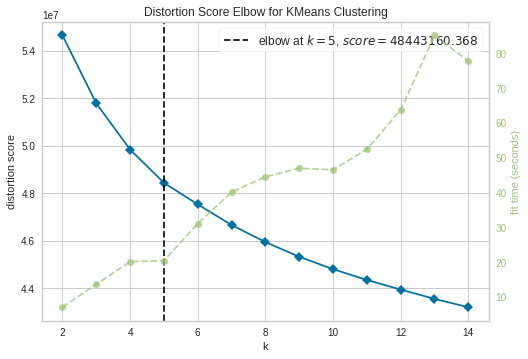

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [89]:
k_means = KMeans(n_clusters=(2,15), init= 'k-means++', n_jobs=-1, random_state = 42 )
visualizer = KElbowVisualizer(k_means, k=(2,15))
visualizer.fit(df)
visualizer.poof()

In [97]:
k_means.inertia_

43201975.554604486

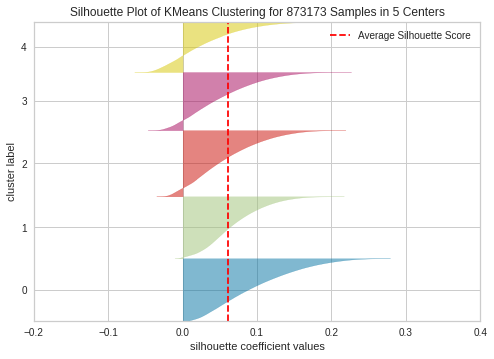

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 873173 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [99]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)
visualizer.show()

In [107]:
visualizer.silhouette_score_

0.06031765159902253

<Figure size 576x396 with 0 Axes>

In [100]:
from sklearn.cluster import KMeans

In [101]:
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2


In [102]:
k = KMeans(n_clusters=5)
k_fit = k.fit(df)

In [103]:
prediction = k_fit.labels_
df['CLUSTER'] = prediction
df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,CLUSTER
0,1,-2,2,-1,2,-2,2,-1,1,-2,-1,2,-1,1,-1,0,-1,1,0,1,0,1,0,-1,-1,1,1,-1,1,1,-2,1,1,-1,-1,-1,-1,-1,0,-1,2,-2,1,-2,1,-2,2,0,1,2,1
1,0,2,0,1,0,0,-1,2,-2,2,-2,1,-2,2,-2,2,0,1,2,0,0,-1,2,0,0,-2,0,0,2,0,-1,0,1,-2,0,-2,-1,-2,0,-2,-2,-1,1,-1,0,-2,1,-1,2,0,0
2,-1,0,1,1,0,-1,-2,0,-1,2,-2,1,-2,1,-1,1,-2,1,1,0,1,-1,-1,-1,0,0,1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-2,0,2,-2,-1,-2,1,-1,2,0,1,1,0
3,-1,-1,-1,0,1,-1,-1,1,-2,1,-1,1,0,1,-1,1,-1,1,0,1,-1,1,1,1,-2,-1,-1,0,-2,1,0,0,0,-1,0,-1,-1,-1,1,0,1,-1,2,-1,0,-2,1,1,0,0,4
4,0,0,0,0,2,0,0,2,0,1,-2,2,-2,2,-2,0,-2,2,2,0,2,-2,2,-2,0,-2,2,-2,2,2,-2,2,2,0,-2,-2,-2,-2,0,-1,2,-2,2,-2,2,-2,2,0,2,2,1


In [104]:
df.CLUSTER.value_counts()

3    193204
0    182038
1    181151
2    171507
4    145273
Name: CLUSTER, dtype: int64

In [106]:
df.groupby('CLUSTER').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
CLUSTER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.851141,0.273580,0.134192,0.635109,0.006169,-0.314561,-0.754375,0.989579,-0.658093,1.111620,-1.147030,0.986706,-1.329898,1.381069,-1.040162,1.180451,-1.014535,1.007691,1.191169,0.740911,0.853855,-0.783968,1.294235,-0.989343,0.252964,-0.942924,1.171755,-0.984756,0.847460,0.892923,0.517837,0.096875,1.151941,-0.367830,-0.182083,-0.202985,-0.142783,-0.580577,-0.042266,-0.314885,0.559740,-0.840044,0.873175,-0.920220,0.713302,-1.006422,1.004422,-0.045979,1.255441,0.786770
1,0.482200,-1.064708,1.345121,-0.787244,1.281290,-1.337481,0.897798,-0.202660,0.767244,-0.492308,-1.107772,1.449128,-1.148738,1.245718,-1.128136,0.850274,-1.401483,1.099387,1.086431,1.199463,0.740035,-0.398231,1.190681,-1.088484,0.122528,-0.702839,0.870793,-1.049362,0.576276,0.885653,-0.680653,0.851731,0.141528,0.318602,-0.884974,-1.094054,-0.889523,-1.325447,-0.880111,-1.282968,0.914149,-1.253634,1.099193,-1.210256,1.169902,-1.341362,1.334743,0.258276,1.107369,1.298072
2,-1.201916,0.641268,-0.767595,1.069811,-0.708653,0.192220,-1.261208,1.087034,-0.837459,1.491572,-0.547890,0.380742,-0.426292,0.856764,-0.450320,0.875055,-0.293218,0.446198,0.686199,0.061409,-0.165229,0.359834,0.821570,0.479934,-0.905508,0.486470,0.575936,0.040972,-0.210895,0.322308,1.288583,-0.542689,1.524737,-0.867621,0.569843,0.894815,1.000735,0.772703,1.007918,0.954602,0.517308,-0.617981,1.071851,-0.874063,0.430507,-0.910767,0.687914,0.183258,1.292373,0.719737
3,0.445586,-1.081132,0.791816,-0.490187,1.052359,-1.176363,0.652502,-0.230953,0.772344,0.008261,-0.861131,1.296350,-0.341302,1.199256,-0.999840,1.019539,-1.144252,0.912419,1.136203,0.855588,-0.017080,0.624982,0.852839,0.249850,-0.775952,0.529057,0.471424,-0.163402,-0.055351,0.492857,0.834988,-0.059548,1.254462,-0.586075,0.285926,0.492221,0.816194,0.467480,0.660923,0.195783,0.782608,-0.897989,1.272044,-1.049580,0.974452,-1.235870,0.993613,0.401048,1.216988,1.211238
4,-0.839055,0.439552,-0.196155,0.583956,-0.381206,-0.139248,-0.873844,0.705183,-0.293213,0.985551,0.089838,-0.000647,-0.329820,-0.139393,0.275020,-0.251175,0.135318,-0.046808,-0.312839,0.076408,0.277450,-0.078335,0.826878,-0.520083,-0.568413,-0.174017,0.545387,-0.408947,-0.118515,0.512456,-0.566451,0.721008,0.126486,-0.002877,-0.607966,-0.896622,-0.600015,-0.992586,-0.297770,-0.622834,0.733853,-1.048323,0.799447,-0.949034,0.798731,-0.952187,1.088557,0.317877,0.915759,0.850075


In [108]:
df_sums = pd.DataFrame()

In [114]:
df_sums['EXTROVERSION'] = df[columns[0:10]].sum(axis=1)/10
df_sums['NEUROTIC'] = df[columns[10:20]].sum(axis=1)/10
df_sums['AGREEABLE'] = df[columns[20:30]].sum(axis=1)/10
df_sums['CONSCIENTIOUS'] = df[columns[30:40]].sum(axis=1)/10
df_sums['OPEN'] = df[columns[40:50]].sum(axis=1)/10

In [115]:
df_sums.head()

,EXTROVERSION,NEUROTIC,AGREEABLE,CONSCIENTIOUS,OPEN
0,0.0,0.1,0.2,-0.6,0.3
1,0.4,0.2,0.1,-0.9,-0.3
2,-0.1,-0.2,-0.2,-0.4,0.1
3,-0.4,0.2,-0.3,-0.3,0.1
4,0.5,0.0,0.2,-0.7,0.6


In [116]:
from sklearn.decomposition import PCA

In [122]:
pca = PCA(n_components=2,random_state=42)
pca_fit = pca.fit_transform(df)
df_pca = pd.DataFrame(data= pca_fit, columns=['PCA1','PCA2'])
df_pca['Clusters']= prediction
df_pca.head()

,PCA1,PCA2,Clusters
0,-5.422810,-1.868092,1
1,-0.054655,3.708550,0
2,-0.856096,2.462564,0
3,1.450511,-0.463043,4
4,-4.898571,3.616731,1


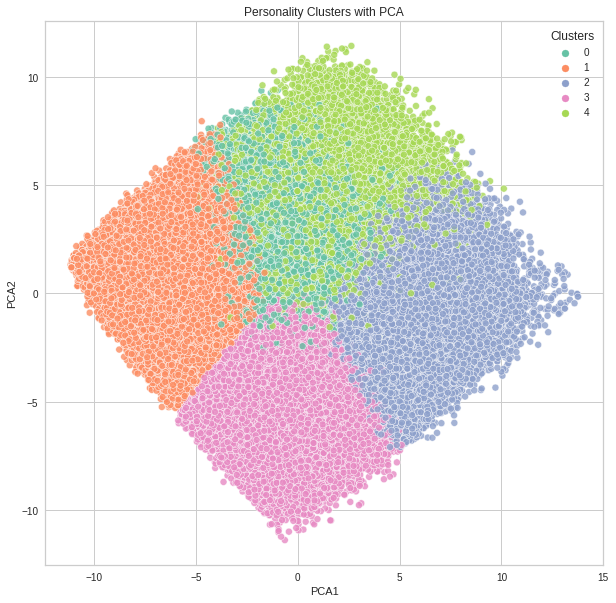

In [124]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca,x=df_pca['PCA1'],y=df_pca['PCA2'],hue='Clusters', 
                palette='Set2',alpha=0.8)
plt.title('Personality Clusters with PCA');

In [126]:
my_data = pd.DataFrame(columns=columns)

In [127]:
my_data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10


In [129]:
my_data.to_csv('./my_data.csv')

In [146]:
person = pd.read_csv('./my_data.csv')

In [147]:
person.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,-2,0,0,2,0,2,-2,2,0,2,0,2,0,0,2,2,2,2,0,0,2,-2,-2,2,0,2,2,-2,0,2,-2,2,0,0,0,-2,-2,-2,-2,0,-2,0,0,2,0,2,0,-2,2,2


In [148]:
person.dropna(axis= 1)


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,-2,0,0,2,0,2,-2,2,0,2,0,2,0,0,2,2,2,2,0,0,2,-2,-2,2,0,2,2,-2,0,2,-2,2,0,0,0,-2,-2,-2,-2,0,-2,0,0,2,0,2,0,-2,2,2


In [151]:
person_prediction = k_fit.predict(person)
print('My Personality Cluster: ', person_prediction)

My Personality Cluster:  [4]


In [156]:
col_list = list(person_prediction)

my_sums = pd.DataFrame()
my_sums['EXTROVERSION'] = person[columns[0:10]].sum(axis=1)/10
my_sums['NEUROTIC'] = person[columns[10:20]].sum(axis=1)/10
my_sums['AGREEABLE'] = person[columns[20:30]].sum(axis=1)/10
my_sums['CONSCIENTIOUS'] = person[columns[30:40]].sum(axis=1)/10
my_sums['OPEN'] = person[columns[40:50]].sum(axis=1)/10
my_sums['Clusters'] = person_prediction
print('Sum of my question groups')
my_sums

Sum of my question groups


,EXTROVERSION,NEUROTIC,AGREEABLE,CONSCIENTIOUS,OPEN,Clusters
0,0.4,1.0,0.4,-0.8,0.4,4


In [153]:
from sklearn.cluster import DBSCAN
dbscan  = DBSCAN(eps=4, min_samples=2).fit(df)

In [155]:
print(dbscan.metric_params)

None
